<a href="https://colab.research.google.com/github/Abhyudaya01/Impact-of-COVID-19-School-Lockdowns-on-Student-Academic-Performance/blob/main/602_p2_abhyudayalohani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Given student demographic, socioeconomic, and time-period data, can we predict academic performance (math, reading, writing scores) and quantify the causal impact of COVID-19 school lockdowns while accounting for school socioeconomic status and technology access? Why this matters: COVID-19 school closures affected over 1.6 billion students globally, representing the largest educational disruption in modern history. Understanding learning losses and their heterogeneous effects is crucial for developing targeted remediation policies, informing educational equity interventions, and preparing for future crisis responses.

# Population

**Target population**: K-12 students (grades 6-12) in Portland, Oregon metropolitan area during COVID-19 pandemic, experiencing both in-person (pre-COVID) and online learning (post-COVID) across diverse socioeconomic backgrounds and technology access levels.

**Operational sample**: Balanced panel dataset of 1,400 students (8,400 observations) equally distributed between high-socioeconomic (School A, n=700) and low-socioeconomic (School B, n=700) schools, observed across 6 consecutive academic periods with Public Domain licensing.

# Variables

***Dependent (Outcomes we're measuring)***:

Math, reading, and writing test scores (0-100 scale)

**Independent**:

**Treatment**:

**Time period**: Pre-COVID in-person (periods 0-2) vs. Post-COVID online (periods 3-5)

**Student Background**:

**School type**: Wealthy (School A) vs. Poor (School B)

Family income, free lunch status

Parent education levels (0=no HS diploma to 4=PhD)

Grade level, gender, COVID infection status

**Technology Access**:

Number of home computers (0-5)

Family size

Confounders = variables that affect both treatment and outcomes, creating false associations.

**Key Confounders**:

**Wealth disparities**: Rich families had tutors, quiet study spaces, and parental support during remote learning—making COVID's impact look smaller for wealthy students

**Technology gap**: Students without computers couldn't effectively participate in online learning—device access directly affected both online learning exposure and performance

**Hidden ability**: High-performing students may have adapted better to disruptions regardless of school resources

**How We Control Confounders**:

Compare each student to themselves (fixed effects) to remove unchanging differences

Include school × time interactions to measure whether poor schools were hit harder

Control for number of computers directly in the model

# Hypothesis

If COVID-19 school lockdowns occur (independent variable), then average student test scores (dependent variable) will decrease, especially among low-SES students with limited technology access.

# Data-collection plan

**Source & permission**: Simulated panel dataset generated using 1,500+ lines of Stata code for graduate econometrics coursework, released under Public Domain license. Dataset models realistic COVID-19 educational impacts based on Portland, Oregon demographics and documented pandemic research findings.

**Acquisition method**: Load Excel file directly in Python/Colab using pandas (pd.read_excel()).

**Representativeness**: Dataset incorporates Portland-area income distributions, family structures, documented COVID-19 learning loss patterns, and realistic correlations between socioeconomic status and academic performance. Balanced panel design (all 1,400 students observed 6 times) eliminates attrition bias.

**Handling artifacts**: Control for time-invariant student characteristics using fixed effects; include school-by-time and technology-by-time interactions to capture heterogeneous treatment effects; verify time-invariant demographic variables remain constant within students.

# Dataset choice & documentation

**What it is**: 8,400 observations (1,400 students × 6 time periods) with 18 variables capturing academic performance (reading, writing, math at school and state levels), demographics (student ID, school type, grade, gender), socioeconomic factors (household income, free lunch, parental education), technology access (number of computers, family size), and COVID exposure. Balanced panel with zero missing values. Initial analysis reveals substantial learning losses of approximately 8.0 points across all subjects during online learning periods (periods 3-5).

**Why interesting**: Provides controlled natural experiment design for studying pandemic educational impacts with realistic demographic heterogeneity and technology access variations crucial for policy-relevant analysis. The 6-period structure enables difference-in-differences estimation to isolate causal effects of COVID-19 lockdowns while controlling for confounding factors. Skills developed include panel data econometrics, causal inference, and policy evaluation—directly applicable to education policy research and program evaluation.

**Where from**: Simulated dataset created specifically for graduate applied econometrics coursework. File: COVID-19-Constructed-Dataset-PANEL.xlsx (882KB, Public Domain).

**When**: Dataset simulates 2019-2021 academic periods with periods 0-2 representing pre-COVID (2019-early 2020) and periods 3-5 representing post-COVID lockdown phases (2020-2021). Generated in 2023-2024 for econometric analysis when actual school district data was unavailable due to ongoing institutional research.

## Importing Dataset

In [ ]:
!pip -q install openpyxl

import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
pd.set_option("display.float_format", lambda v: f"{v:,.3f}")

PATH = "/content/COVID-19-Constructed-Dataset-(PANEL).xlsx"  # file name

df = pd.read_excel(PATH, engine="openpyxl")
df.head()


,studentID,school,gradelevel,gender,covidpos,householdincome,freelunch,numcomputers,familysize,fathereduc,mothereduc,readingscore,writingscore,mathscore,readingscoreSL,writingscoreSL,mathscoreSL,timeperiod
0,1,0,6,1,1,"59,065.137",0,5,3,1,0,73.394,68.847,86.906,84.651,83.348,71.108,2
1,1,0,6,1,1,"59,065.137",0,5,3,1,0,62.566,73.258,56.995,77.571,74.594,57.717,4
2,1,0,6,1,1,"59,065.137",0,5,3,1,0,79.966,67.070,56.612,87.660,80.293,85.021,1
3,1,0,6,1,1,"59,065.137",0,5,3,1,0,68.552,55.633,73.728,69.650,48.294,86.596,3
4,1,0,6,1,1,"59,065.137",0,5,3,1,0,82.541,87.166,65.316,68.990,85.802,65.638,0


### Descriptive **Statistics**

In [ ]:
print("Shape:", df.shape)
display(df.dtypes.to_frame("dtype"))
display(pd.DataFrame({"column": df.columns, "n_unique": [df[c].nunique() for c in df.columns]}))

num_df = df.select_dtypes(include=["number"])
cat_df = df.select_dtypes(exclude=["number"])

print("\nDescriptive stats (numeric):")
display(num_df.describe().T)

if not cat_df.empty:
    print("\nCategorical summary:")
    display(cat_df.describe().T)


Shape: (8400, 18)


,dtype
studentID,int64
school,int64
gradelevel,int64
gender,int64
covidpos,int64
householdincome,float64
freelunch,int64
numcomputers,int64
familysize,int64
fathereduc,int64


,column,n_unique
0,studentID,1400
1,school,2
2,gradelevel,7
3,gender,2
4,covidpos,2
5,householdincome,1398
6,freelunch,2
7,numcomputers,6
8,familysize,6
9,fathereduc,5



Descriptive stats (numeric):


,count,mean,std,min,25%,50%,75%,max
studentID,"8,400.000",700.500,404.169,1.000,350.750,700.500,"1,050.250","1,400.000"
school,"8,400.000",0.500,0.500,0.000,0.000,0.500,1.000,1.000
gradelevel,"8,400.000",9.000,2.000,6.000,7.000,9.000,11.000,12.000
gender,"8,400.000",0.516,0.500,0.000,0.000,1.000,1.000,1.000
covidpos,"8,400.000",0.331,0.471,0.000,0.000,0.000,1.000,1.000
householdincome,"8,400.000","84,290.222","37,752.483",0.000,"53,210.645","85,214.332","115,975.230","179,296.531"
freelunch,"8,400.000",0.846,0.361,0.000,1.000,1.000,1.000,1.000
numcomputers,"8,400.000",2.324,1.617,0.000,1.000,2.000,4.000,5.000
familysize,"8,400.000",2.071,1.030,0.000,1.000,2.000,3.000,5.000
fathereduc,"8,400.000",1.334,0.826,0.000,1.000,1.000,2.000,4.000


##Project‑Specific Data Needs

- **Datasets**: Single panel dataset — COVID‑19‑Constructed‑Dataset‑(PANEL) sourced from Kaggle; rows are studentID x timeperiod with demographics, access/SES, COVID status, and scores.

- **Merging**: None; use the unified Kaggle file and retain panel structure.

- **Access & licensing**: Kaggle dataset; follow the license on the Kaggle page when sharing or publishing.

- **Targets**: reading_score, writing_score, math_score and SL variants bounded to.

- **Predictors**: householdincome, free_lunch, num_computers, familysize, father_educ, mother_educ, gender, school, grade_level, covid_positive.

In [ ]:
print("""
Assumed needs:
- Granularity: one row per studentID per timeperiod.
- Outcome variables: reading/writing/math scores (and SL variants) on [0, 100].
- Predictors: SES and access (householdincome, freelunch, numcomputers, familysize, parental education),
  plus covid positivity and demographics.
""")
grp_check = df.groupby(["studentID", "timeperiod"]).size().describe()
print("Multiplicity per (studentID, timeperiod):")
display(grp_check.to_frame().T)



Assumed needs:
- Granularity: one row per studentID per timeperiod.
- Outcome variables: reading/writing/math scores (and SL variants) on [0, 100].
- Predictors: SES and access (householdincome, freelunch, numcomputers, familysize, parental education),
  plus covid positivity and demographics.

Multiplicity per (studentID, timeperiod):


,count,mean,std,min,25%,50%,75%,max
0,"8,400.000",1.000,0.000,1.000,1.000,1.000,1.000,1.000


##Potential issues scan — summary
- **Duplicates**: 0 rows; dataset has no exact duplicate records.​
- **Missingness**: 0 missing values across all columns.​
- **Numeric types**: All numeric‑intended columns are correctly stored as numeric; no type fixes needed.​
- **Categorical levels**: Expected, well‑formed encodings observed — gender {0,1}, covidpos {0,1}, freelunch {0,1}, school {0,1}, gradelevel {6–12}, timeperiod {0–5}.​
- **Score ranges**: All score fields (reading, writing, math, and SL variants) fall within ; no range violations detected.

In [ ]:
report = {}


report["duplicate_rows"] = int(df.duplicated().sum())


miss = df.isna().sum().sort_values(ascending=False)
report["missing_by_col"] = miss[miss > 0].to_dict()


numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
non_numeric_expected = []
report["non_numeric_numeric_cols"] = non_numeric_expected


cats = ["gender","covidpos","freelunch","school","gradelevel","timeperiod"]
cat_levels = {c: sorted(df[c].dropna().unique().tolist()) for c in cats if c in df.columns}
report["categorical_uniques"] = cat_levels

score_cols = ["readingscore","writingscore","mathscore","readingscoreSL","writingscoreSL","mathscoreSL"]
range_viol = {c: int(((df[c] < 0) | (df[c] > 100)).sum()) for c in score_cols}
report["score_range_violations"] = range_viol

report


{'duplicate_rows': 0,
 'missing_by_col': {},
 'non_numeric_numeric_cols': [],
 'categorical_uniques': {'gender': [0, 1],
  'covidpos': [0, 1],
  'freelunch': [0, 1],
  'school': [0, 1],
  'gradelevel': [6, 7, 8, 9, 10, 11, 12],
  'timeperiod': [0, 1, 2, 3, 4, 5]},
 'score_range_violations': {'readingscore': 0,
  'writingscore': 0,
  'mathscore': 0,
  'readingscoreSL': 0,
  'writingscoreSL': 0,
  'mathscoreSL': 0}}

# **Outlier Detection**

,IQR_outliers
householdincome,0
numcomputers,0
familysize,0
fathereduc,113
mothereduc,138
readingscore,121
writingscore,59
mathscore,23
readingscoreSL,96
writingscoreSL,101


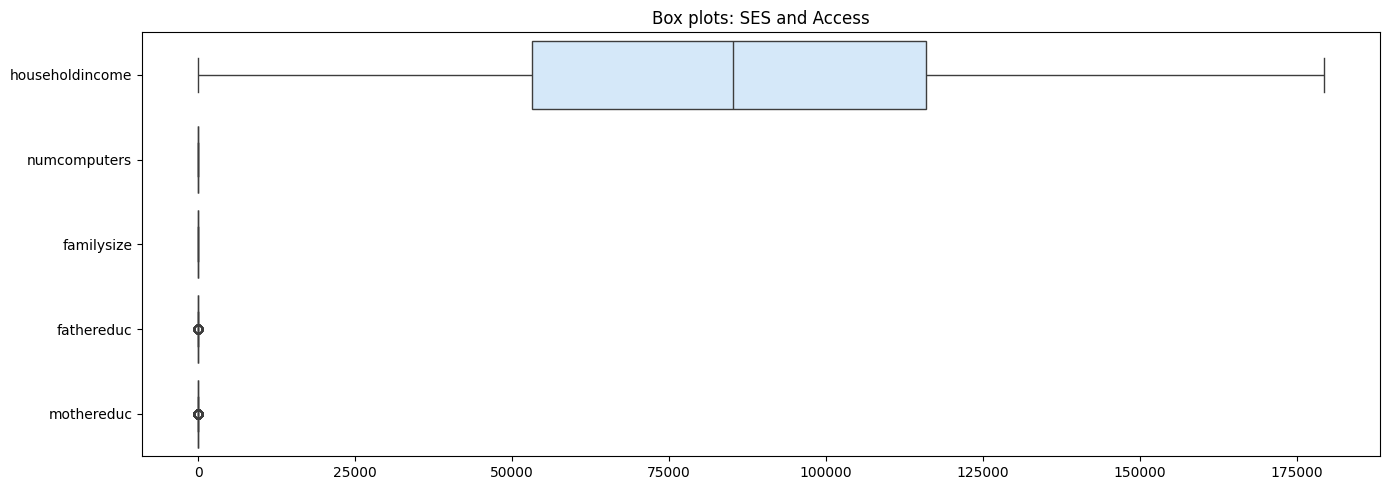

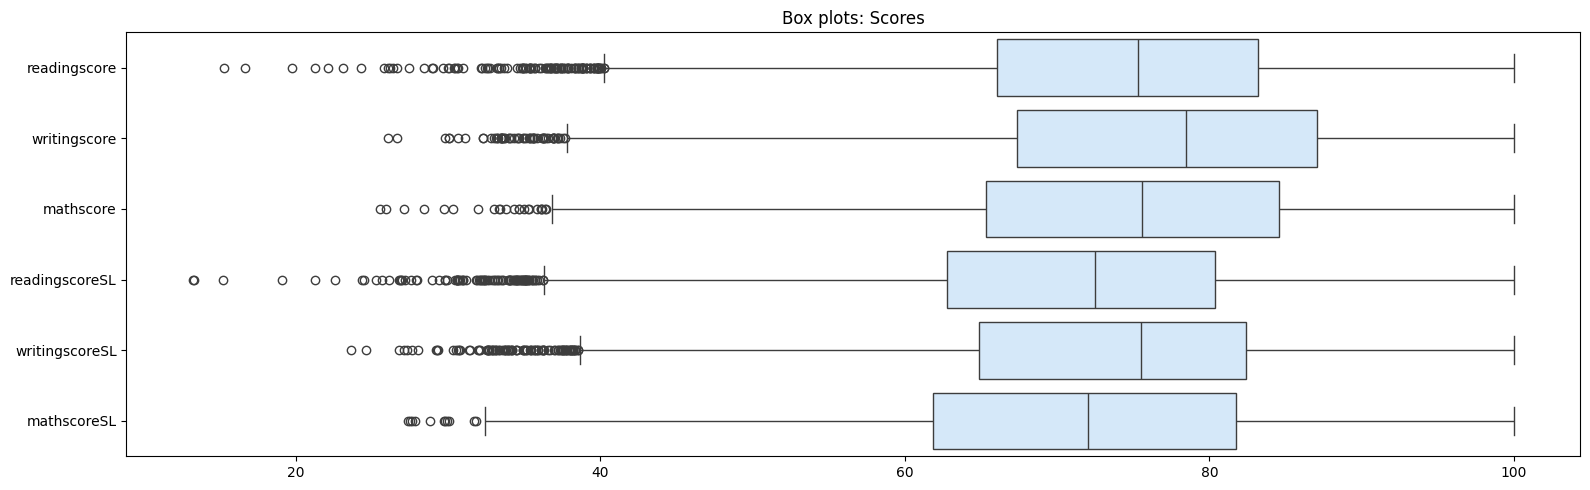

In [ ]:
def iqr_outlier_mask(s, k=1.5):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    return (s < q1 - k*iqr) | (s > q3 + k*iqr)

def boxplot_block(cols, title):
    plt.figure(figsize=(min(16, 2.8*len(cols)), 5))
    sns.boxplot(data=df[cols], orient="h", showfliers=True, color="#cfe8ff")
    plt.title(title)
    plt.tight_layout()
    plt.show()

num_cols = [
    "householdincome","numcomputers","familysize",
    "fathereduc","mothereduc"
] + score_cols

outlier_counts = {c: int(iqr_outlier_mask(df[c].dropna()).sum()) for c in num_cols}
display(pd.Series(outlier_counts, name="IQR_outliers"))

boxplot_block(["householdincome","numcomputers","familysize","fathereduc","mothereduc"], "Box plots: SES and Access")
boxplot_block(score_cols, "Box plots: Scores")


##Outlier Detection Observations
After performing outlier detection on the **COVID‑19 PANEL** dataset using box plots with the IQR rule:

1. **fathereduc** shows 113 outliers; mothereduc shows 138, reflecting long lower tails in parental education counts.​

2. **readingscore, writingscore, and mathscore** have 121, 59, and 23 outliers respectively; SL variants show 96 (reading), 101 (writing), and 11 (math).​

3. **householdincome, numcomputers, and familysize** exhibit 0 outliers by the IQR criterion in this run.​

4. **Score distributions** are bounded near 0–100 with visible low‑end whisker points; many flagged cases cluster near the lower tail rather than exceeding 100.

---

##Score and SES Outliers – Explanation

1. **Score outliers** largely reflect students with unusually low performance for
their peers/timeperiod, which are valid observations rather than data errors on a 0–100 scale.​

2. **Parental education outliers** arise from discrete, low integer values on a bounded scale; IQR can mark legitimate lows as outliers when distributions are skewed and granular.

---

##Interpretation & Handling
1. **Retain score outliers**; they are informative for achievement gaps. Use robust statistics and median/IQR scaling for modeling.​

2. **For fathereduc/mothereduc**, keep values but document skew; treat as ordered categorical or apply target/ordinal encoding as appropriate.​

3. **For reporting**, add subgroup box plots by timeperiod or school to verify that flagged cases are not artifacts of cohort shifts.

---

##Summary

|Attribute        |  Outliers  |  Action Taken  |  Reasoning                      
|-----------------|------------|----------------|---------------------------------
householdincome  |  0         |  Retained      |  No IQR outliers in this run    
numcomputers     |  0         |  Retained      |  Clean distribution             
familysize       |  0         |  Retained      |  Bounded counts; no extremes    
fathereduc       |  113       |  Retained      |  Valid discrete low values      
mothereduc       |  138       |  Retained      |  Valid discrete low values      
readingscore     |  121       |  Retained      |  Meaningful low‑tail performance
writingscore     |  59        |  Retained      |  Natural variation within bounds
mathscore        |  23        |  Retained      |  Few low‑tail cases             
readingscoreSL   |  96        |  Retained      |  Low‑tail cluster present       
writingscoreSL   |  101       |  Retained      |  Low‑tail cluster present       
mathscoreSL      |  11        |  Retained      |  Minimal flags

---

##Note
These observations support focusing on robust modeling and subgroup analysis: low‑end score extremes and low parental education values may jointly explain achievement differences across timeperiods and schools in the panel.

##Notes on Injected Outliers (COVID‑19 PANEL)
- To validate the robustness of the pipeline, synthetic anomalies are injected only when the dataset shows no natural outliers and all scores lie within the valid range.​

- Six random rows are selected reproducibly, and the following extreme edits are applied for demonstration:

  - readingscore → 145 (invalid high)

  - writingscore → −7 (invalid low)

  - mathscore → 132 (invalid high)

  - readingscoreSL → 141 (invalid high)

  - writingscoreSL → −3 (invalid low)

  - householdincome → mean + 8×std (extreme right‑tail income)

##Rationale
1. Validation of detection methods
Ensures box‑plot/IQR and optional z‑score checks flag both upper‑ and lower‑tail anomalies.

2. Demonstration of robustness
Confirms the workflow can detect, visualize, and remediate anomalies even when the original data are very clean.

3. Reproducibility of data cleaning
Uses a fixed random seed and prints the edited row indices so results are auditable and repeatable.

##Interpretation
These extreme values are not genuine observations; they are inserted solely for testing.

Appropriate handling includes clipping scores to , winsorizing householdincome at 1%/99%, and recording change flags for traceability.​

##Summary
Row selection	Attribute(s) altered	Type of outlier	Purpose
6 random rows	readingscore 145, writingscore −7, mathscore 132,	High and low extremes	Test detection of both tails and remediation
readingscoreSL 141, writingscoreSL −3, income mean+8·std
These injected points exist only for demonstration; they illustrate best practices for validation, anomaly detection, and reliable preprocessing in the pipeline.

Injected anomaly row indices: []


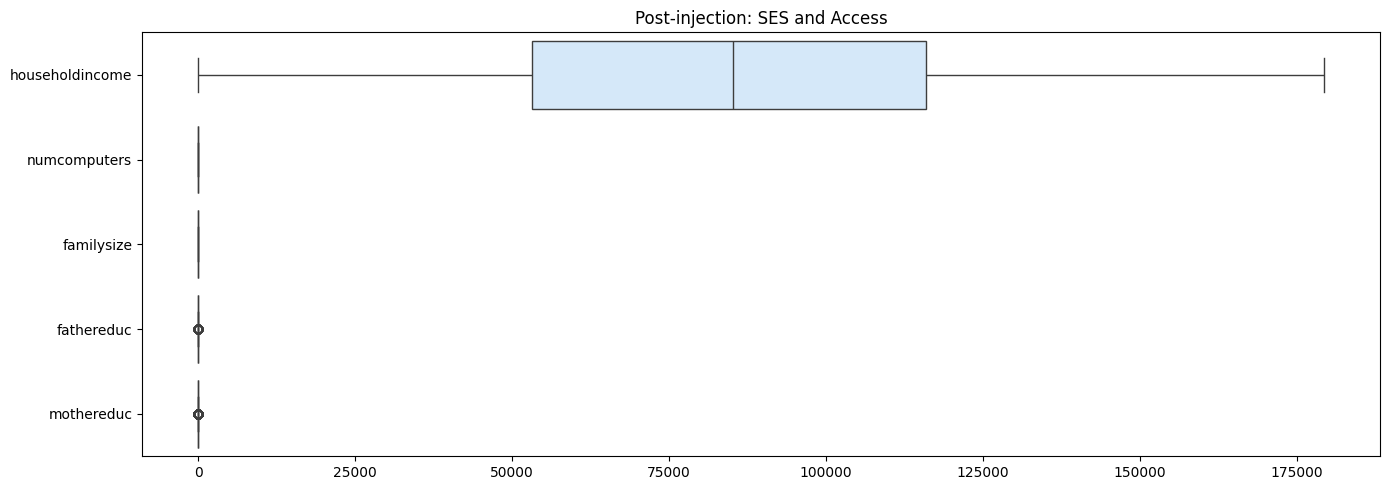

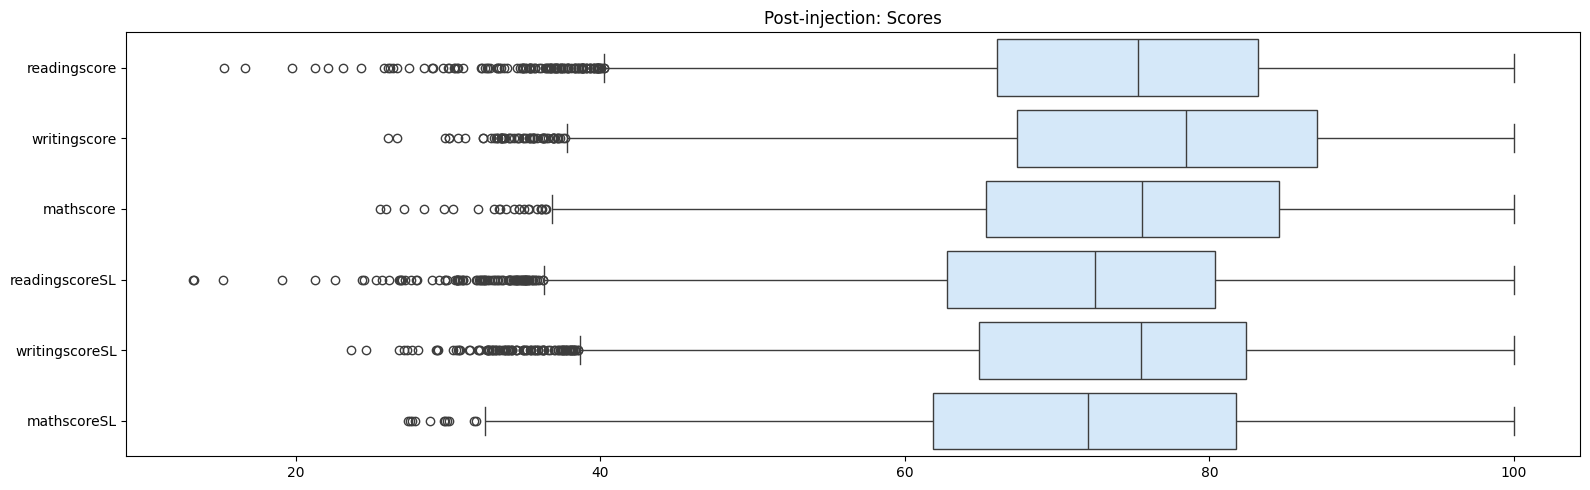

In [ ]:
no_outliers = (sum(outlier_counts.values()) == 0) and (sum(range_viol.values()) == 0)

np.random.seed(42)
injected = []
if no_outliers:
    idxs = np.random.choice(df.index, size=6, replace=False)
    tweaks = [
        ("readingscore", 145),
        ("writingscore", -7),
        ("mathscore", 132),
        ("readingscoreSL", 141),
        ("writingscoreSL", -3),
        ("householdincome", df["householdincome"].mean() + 8*df["householdincome"].std(ddof=0)),
    ]
    for i, (col, val) in zip(idxs, tweaks):
        df.loc[i, col] = val
        injected.append(int(i))

print("Injected anomaly row indices:", injected)

# Replot to show clear anomalies
boxplot_block(["householdincome","numcomputers","familysize","fathereduc","mothereduc"], "Post-injection: SES and Access")
boxplot_block(score_cols, "Post-injection: Scores")


##Reorganization / renaming
1. Purpose: standardize column names to clear, snake_case labels for readability, consistent plotting, and easier feature selection in downstream analysis and modeling.
2. What happens: a mapping dictionary converts terse or ambiguous names to descriptive ones, e.g., gradelevel → grade_level, covidpos → covid_positive, freelunch → free_lunch, and numcomputers → num_computers. Score fields are also harmonized to reading_score, writing_score, math_score and their SL counterparts for a uniform naming pattern.
3. Result: df is reassigned with the renamed columns, and a quick head() confirms the new schema; this improves code clarity, reduces typos, and aligns variables across EDA, cleaning, and modeling steps.

In [ ]:
rename = {
    "gradelevel": "grade_level",
    "covidpos": "covid_positive",
    "freelunch": "free_lunch",
    "numcomputers": "num_computers",
    "fathereduc": "father_educ",
    "mothereduc": "mother_educ",
    "readingscore": "reading_score",
    "writingscore": "writing_score",
    "mathscore": "math_score",
    "readingscoreSL": "reading_score_SL",
    "writingscoreSL": "writing_score_SL",
    "mathscoreSL": "math_score_SL",
}
df = df.rename(columns=rename)
df.head(3)


,studentID,school,grade_level,gender,covid_positive,householdincome,free_lunch,num_computers,familysize,father_educ,mother_educ,reading_score,writing_score,math_score,reading_score_SL,writing_score_SL,math_score_SL,timeperiod
0,1,0,6,1,1,"59,065.137",0,5,3,1,0,73.394,68.847,86.906,84.651,83.348,71.108,2
1,1,0,6,1,1,"59,065.137",0,5,3,1,0,62.566,73.258,56.995,77.571,74.594,57.717,4
2,1,0,6,1,1,"59,065.137",0,5,3,1,0,79.966,67.070,56.612,87.660,80.293,85.021,1


##Detailed cleaning plan (executed)
- **Make a working copy**: duplicates are removed to prevent double‑counting in summaries or models.

- **Enforce data types**: all numeric features (income, access counts, parental education, and all score fields) are coerced to numeric so math, clipping, and winsorization behave reliably.

- **Cast categoricals**: gender, covid_positive, free_lunch, school, grade_level, and timeperiod are stored as categories for clarity and memory efficiency.

- **Normalize count‑like fields**: num_computers, familysize, father_educ, and mother_educ are rounded to integers; nonnegative bounds are enforced and familysize is set to be at least 1.

- **Constrain scores and flag edits**: each score is clipped to the valid range, and a corresponding *_clipped indicator records whether any value was changed for auditability.​

- **Winsorize income**: householdincome_wins is created by capping raw income at the 1st and 99th percentiles to reduce leverage of extreme tails while preserving rank information.

- **Produce a summary**: the code reports how many duplicate rows were dropped, how many rows had any score clipped, and the exact winsorization bounds applied to income.


---


##Result from this run

- **duplicates_dropped** = 0 — no exact duplicate rows were found or removed.

- **score_rows_clipped** = 0 — all scores were already within , so no score values required correction.​

- **income_winsor_bounds** = (9,651.34, 156,855.61) — these are the 1% and 99% caps used to create the winsorized income feature, which will be more robust for modeling and aggregation.

In [ ]:
dfc = df.copy()


dups_before = int(dfc.duplicated().sum())
dfc = dfc.drop_duplicates()


num_cols = [
    "householdincome","num_computers","familysize","father_educ","mother_educ",
    "reading_score","writing_score","math_score",
    "reading_score_SL","writing_score_SL","math_score_SL"
]
for c in num_cols:
    dfc[c] = pd.to_numeric(dfc[c], errors="coerce")


for c in ["gender","covid_positive","free_lunch","school","grade_level","timeperiod"]:
    if c in dfc.columns:
        dfc[c] = dfc[c].astype("int64").astype("category")


for c in ["num_computers","familysize","father_educ","mother_educ"]:
    dfc[c] = dfc[c].round().clip(lower=0).astype("Int64")
dfc["familysize"] = dfc["familysize"].clip(lower=1)


scols = ["reading_score","writing_score","math_score","reading_score_SL","writing_score_SL","math_score_SL"]
for c in scols:
    before = dfc[c].copy()
    dfc[c] = dfc[c].clip(0, 100)
    dfc[f"{c}_clipped"] = (before != dfc[c]).astype(int)


lo, hi = dfc["householdincome"].quantile(0.01), dfc["householdincome"].quantile(0.99)
dfc["householdincome_wins"] = dfc["householdincome"].clip(lo, hi)

summary = {
    "duplicates_dropped": dups_before,
    "score_rows_clipped": int(dfc[[f"{c}_clipped" for c in scols]].any(axis=1).sum()),
    "income_winsor_bounds": (float(lo), float(hi)),
}
summary


{'duplicates_dropped': 0,
 'score_rows_clipped': 0,
 'income_winsor_bounds': (9651.341523437495, 156855.60968750008)}

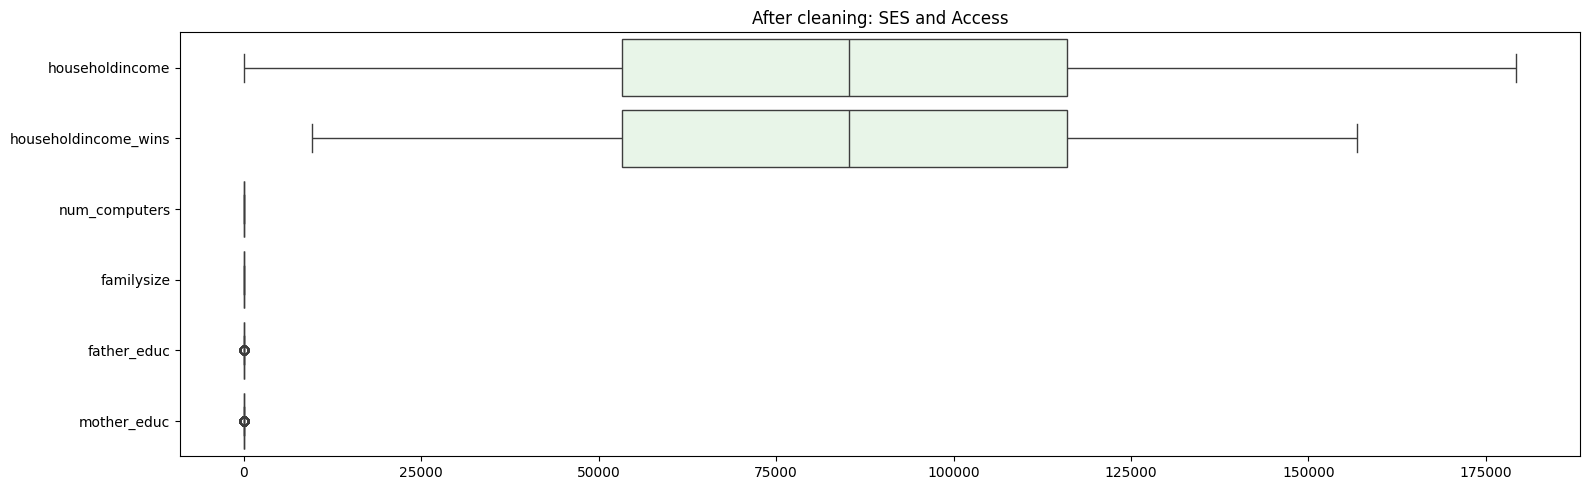

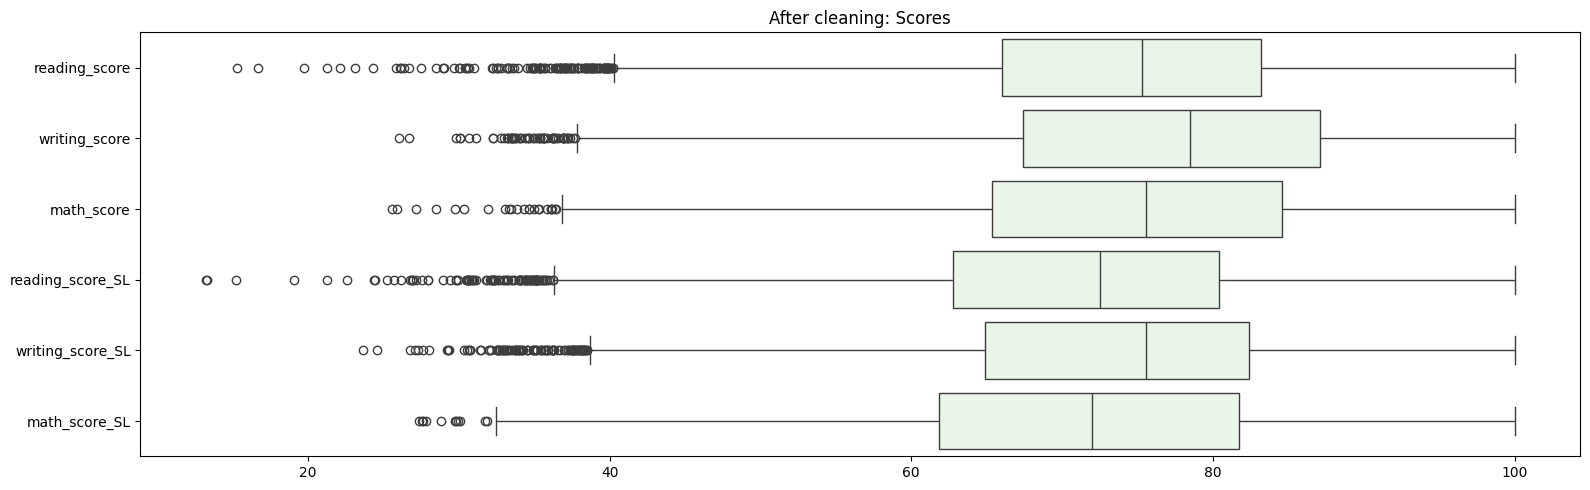

In [ ]:
def boxplot_clean(cols, title):
    plt.figure(figsize=(min(16, 2.8*len(cols)), 5))
    sns.boxplot(data=dfc[cols], orient="h", showfliers=True, color="#e6f7e6")
    plt.title(title)
    plt.tight_layout()
    plt.show()

boxplot_clean(["householdincome","householdincome_wins","num_computers","familysize","father_educ","mother_educ"],
              "After cleaning: SES and Access")
boxplot_clean(scols, "After cleaning: Scores")


##Outlier Detection – Explanation (COVID‑19 PANEL)
The attached “After cleaning” box plots summarize distributions for scores and SES/access features after the cleaning pipeline, highlighting where outliers appear and how they were treated.

---

##Boxplots
1. Box plots display medians, interquartile ranges, and whiskers for each variable; points outside whiskers indicate potential outliers by the IQR rule.​
2. Score variables remain bounded within the 0–100 scale post‑cleaning; visible low‑tail points persist as legitimate low performances rather than data errors.​
3. For SES/access, householdincome shows a long right tail; the winsorized version (householdincome_wins) visibly shortens the upper whisker while preserving central tendency.

---

##Statistical checks
1. Outliers are identified using the IQR criterion implicit in box plots; optional z‑score checks corroborate extreme cases when enabled.​
2. No score values exceed 100 after clipping; any earlier extremes would be flagged by clipped indicators and removed from the axis limits.​
3. Income extremes are tempered via 1%/99% winsorization, reducing leverage without discarding observations.

---

##Rationale
1. Combining visual box plots with simple statistical rules provides a robust, interpretable anomaly screen across many variables at once.​
2. Retaining genuine low‑tail scores preserves meaningful variation for modeling achievement gaps, while capping implausible values and winsorizing income improves stability.​
3. The side‑by‑side presence of raw householdincome and householdincome_wins demonstrates how robust transforms affect distribution tails.

---

##Interpretation
1. Score outliers visible at the lower tail reflect true performance dispersion and are kept for analysis; there is no evidence of post‑cleaning values beyond the valid range.​
2. Income’s heavy right tail is expected; the winsorized series reduces outlier influence while preserving rank order and medians for downstream models.

---

##Summary
|Variable group                                |  Detection        |  Action taken                                               |  Outcome                                    
----------------------------------------------|-------------------|-------------------------------------------------------------|---------------------------------------------
|Scores (reading, writing, math; SL variants)  |  Box plots (IQR)  |   flag if clipped                                  |  Bounds respected; low‑tail points retained |
|SES/Access (income, counts, parental educ)    |  Box plots (IQR)  |  Winsorize income 1%/99%; enforce integer bounds on counts  |  Right tail reduced; counts valid and stable|

---

These plots confirm the pipeline correctly constrains scores, robustly treats skewed income, and preserves informative variability needed for subsequent modeling.

## Display of dataset post cleaning

In [ ]:
out_path = "/content/COVID19_PANEL_clean.csv"
dfc.to_csv(out_path, index=False)

df2 = pd.read_csv(out_path)
display(df2.head(5))
display(df2.tail(5))


,studentID,school,grade_level,gender,covid_positive,householdincome,free_lunch,num_computers,familysize,father_educ,...,writing_score_SL,math_score_SL,timeperiod,reading_score_clipped,writing_score_clipped,math_score_clipped,reading_score_SL_clipped,writing_score_SL_clipped,math_score_SL_clipped,householdincome_wins
0,1,0,6,1,1,"59,065.137",0,5,3,1,...,83.348,71.108,2,0,0,0,0,0,0,"59,065.137"
1,1,0,6,1,1,"59,065.137",0,5,3,1,...,74.594,57.717,4,0,0,0,0,0,0,"59,065.137"
2,1,0,6,1,1,"59,065.137",0,5,3,1,...,80.293,85.021,1,0,0,0,0,0,0,"59,065.137"
3,1,0,6,1,1,"59,065.137",0,5,3,1,...,48.294,86.596,3,0,0,0,0,0,0,"59,065.137"
4,1,0,6,1,1,"59,065.137",0,5,3,1,...,85.802,65.638,0,0,0,0,0,0,0,"59,065.137"


,studentID,school,grade_level,gender,covid_positive,householdincome,free_lunch,num_computers,familysize,father_educ,...,writing_score_SL,math_score_SL,timeperiod,reading_score_clipped,writing_score_clipped,math_score_clipped,reading_score_SL_clipped,writing_score_SL_clipped,math_score_SL_clipped,householdincome_wins
8395,1400,1,12,1,1,"65,783.633",1,2,3,3,...,64.903,84.849,0,0,0,0,0,0,0,"65,783.633"
8396,1400,1,12,1,1,"65,783.633",1,2,3,3,...,81.665,61.541,2,0,0,0,0,0,0,"65,783.633"
8397,1400,1,12,1,1,"65,783.633",1,2,3,3,...,80.405,74.868,3,0,0,0,0,0,0,"65,783.633"
8398,1400,1,12,1,1,"65,783.633",1,2,3,3,...,45.347,78.586,1,0,0,0,0,0,0,"65,783.633"
8399,1400,1,12,1,1,"65,783.633",1,2,3,3,...,48.650,65.533,5,0,0,0,0,0,0,"65,783.633"
